In [14]:
import time
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing

rapl_package = '/sys/class/powercap/intel-rapl:0'

def get_energy():
    uj = int(subprocess.check_output(['eumaster4hpc-powercap-get', f'{rapl_package}/energy_uj']))
    return uj / 1000000

def get_energy_diff(a, b):
    print(f'Energy before: {a}')
    print(f'Energy after: {b}')
    if b > a:
        return b - a
    else:
        maximal = int(subprocess.check_output(['cat', f'{rapl_package}/max_energy_range_uj']))
        print(f'Maximal: {maximal}')
        return b + maximal - a

def run_task(*args):
    subprocess.call(['eumaster4hpc-task', *args])

def benchmark_once(*args):
    time1 = time.time()
    energy1 = get_energy()
    run_task(*args)
    energy2 = get_energy()
    time2 = time.time()

    total_energy = get_energy_diff(energy1, energy2)
    total_time = time2 - time1

    return total_time, total_energy

def print_benchmark_once(*args):
    total_time, total_energy = benchmark_once(*args)
    print(f'Total time: {total_time}')
    print(f'Total energy: {total_energy} J')


def benchmark_amdahl(*args):
    x = range(1, multiprocessing.cpu_count() + 1)
    y = [benchmark_once(*args, str(i)) for i in x]
    time = [i[0] for i in y]
    energy = [i[1] for i in y]
    speedup = [0] * len(time)
    for i in range(0, len(speedup)):
        speedup[i] = time[0] / time[i]

    fig, ax = plt.subplots()
    ax.plot(x, speedup)
    ax.set(xlabel='cores', ylabel='speedup')
    ax.grid()

    fig, ax = plt.subplots()
    ax.plot(x, time)
    ax.set(xlabel='cores', ylabel='time [s]')
    ax.grid()

    fig, ax = plt.subplots()
    ax.plot(x, energy)
    ax.set(xlabel='cores', ylabel='energy [J]')
    ax.grid()

    plt.show()


def benchmark_problem_size(*args):
    x = range(500, 3000, 500)
    y = [benchmark_once(*args, str(i), str(multiprocessing.cpu_count())) for i in x]
    time = [i[0] for i in y]
    energy = [i[1] for i in y]
    speedup = [0] * len(time)
    for i in range(0, len(speedup)):
        speedup[i] = time[0] / time[i]

    fig, ax = plt.subplots()
    ax.plot(x, speedup)
    ax.set(xlabel='problem size', ylabel='speedup')
    ax.grid()

    fig, ax = plt.subplots()
    ax.plot(x, time)
    ax.set(xlabel='problem size', ylabel='time [s]')
    ax.grid()

    fig, ax = plt.subplots()
    ax.plot(x, energy)
    ax.set(xlabel='problem size', ylabel='energy [J]')
    ax.grid()

    plt.show()


## Sequential benchmark

In [ ]:
print_benchmark_once('sequential', '100')


## Rayon benchmark

In [ ]:
benchmark_amdahl('rayon', '1000')


Results len: 250000
Time: 852.347301ms
Energy before: 53383.80517
Energy after: 53512.532685
Results len: 1000000
Time: 7.356365303s
Energy before: 53512.654633
Energy after: 54318.153791
Results len: 2250000
Time: 24.571509592s
Energy before: 54318.331281
Energy after: 56765.759708
Results len: 4000000
Time: 59.086048842s
Energy before: 56765.93378
Energy after: 62554.321244
Results len: 6250000
Time: 115.477204669s
Energy before: 62554.53505
Energy after: 73802.599089


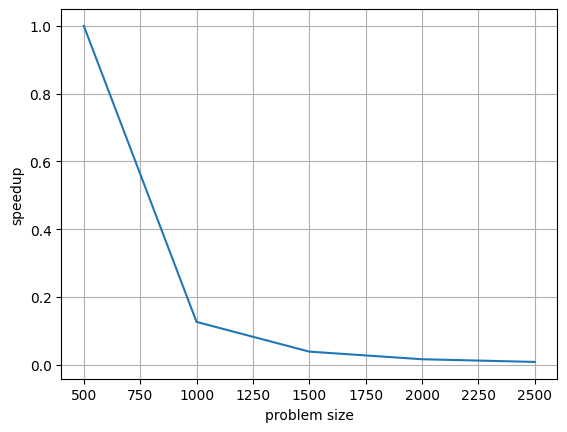

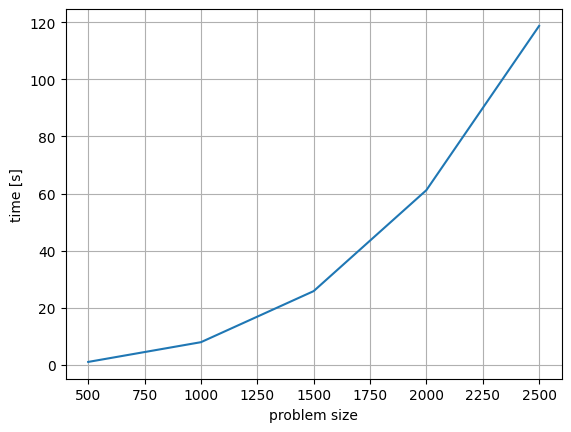

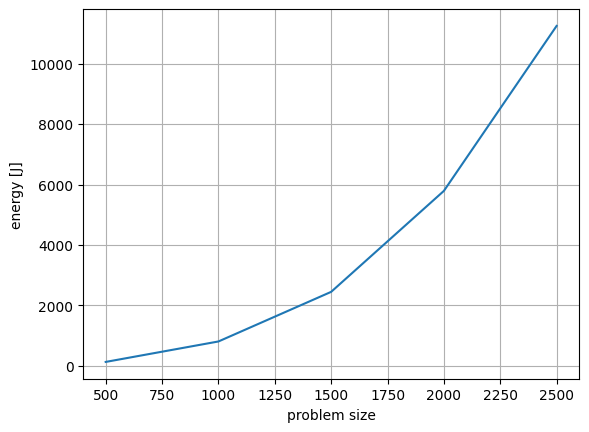

In [15]:
benchmark_problem_size('rayon')


jak wygląda zużycie energii w zależności od domeny RAPL i problemu i rozmiaru problemu i równoległości (fizyczne vs logiczne)

ep
is
MG
FT

klasy A-D

w sumie 64 testy
